In [635]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import glob
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import cv2
import random
import sys
import torch.nn as nn
import torch.nn.functional as F

In [636]:
mild_demented,moderate_demented,non_demented,verymild_demented=[],[],[],[]

In [637]:
#Reading Mild Demented
mild_demented_path=r"C:\Users\Asus\Desktop\projectexpo\Data-86400\Mild Demented"
moderate_demented_path=r"C:\Users\Asus\Desktop\projectexpo\Data-86400\Moderate Demented"
non_demented_path=r"C:\Users\Asus\Desktop\projectexpo\Data-86400\Non Demented"
verymild_demented_path=r"C:\Users\Asus\Desktop\projectexpo\Data-86400\Very Mild Demented"  

In [638]:
for files in glob.iglob(mild_demented_path+'**/*', recursive=True):
    img=cv2.imread(files)
    img=cv2.resize(img,(240,240))
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])
    mild_demented.append(img)
for files in glob.iglob(moderate_demented_path+'**/*', recursive=True):
    img=cv2.imread(files)
    img=cv2.resize(img,(240,240))
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])
    moderate_demented.append(img)
for files in glob.iglob(non_demented_path+'**/*', recursive=True):
    img=cv2.imread(files)
    img=cv2.resize(img,(240,240))
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])
    non_demented.append(img)
for files in glob.iglob(verymild_demented_path+'**/*', recursive=True):
    img=cv2.imread(files)
    img=cv2.resize(img,(240,240))
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])
    verymild_demented.append(img)

In [639]:
moderate_demented=np.array(moderate_demented)
mild_demented=np.array(mild_demented)
non_demented=np.array(non_demented)
verymild_demented=np.array(verymild_demented)
dataset=np.concatenate((moderate_demented,mild_demented,non_demented,verymild_demented))

In [640]:

def showImage(moderate_demented, mild_demented, non_demented, verymild_demented, num=5):
    # Randomly select images from each category
    moderate_demented_img = moderate_demented[np.random.choice(moderate_demented.shape[0], size=num, replace=False)]
    mild_demented_img = mild_demented[np.random.choice(mild_demented.shape[0], size=num, replace=False)]
    non_demented_img = non_demented[np.random.choice(non_demented.shape[0], size=num, replace=False)]
    verymild_demented_img = verymild_demented[np.random.choice(verymild_demented.shape[0], size=num, replace=False)]
    
    # Set up the figure with a grid layout
    fig, axes = plt.subplots(4, num, figsize=(20, 15))
    fig.suptitle('Alzheimer\'s Disease Categories', fontsize=20)

    # Plot each category
    for i in range(num):
        # Moderate Demented
        axes[0, i].imshow(moderate_demented_img[i])
        axes[0, i].set_title("Moderate Demented")
        axes[0, i].axis('off')

        # Mild Demented
        axes[1, i].imshow(mild_demented_img[i])
        axes[1, i].set_title("Mild Demented")
        axes[1, i].axis('off')

        # Non Demented
        axes[2, i].imshow(non_demented_img[i])
        axes[2, i].set_title("Non Demented")
        axes[2, i].axis('off')

        # Very Mild Demented
        axes[3, i].imshow(verymild_demented_img[i])
        axes[3, i].set_title("Very Mild Demented")
        axes[3, i].axis('off')

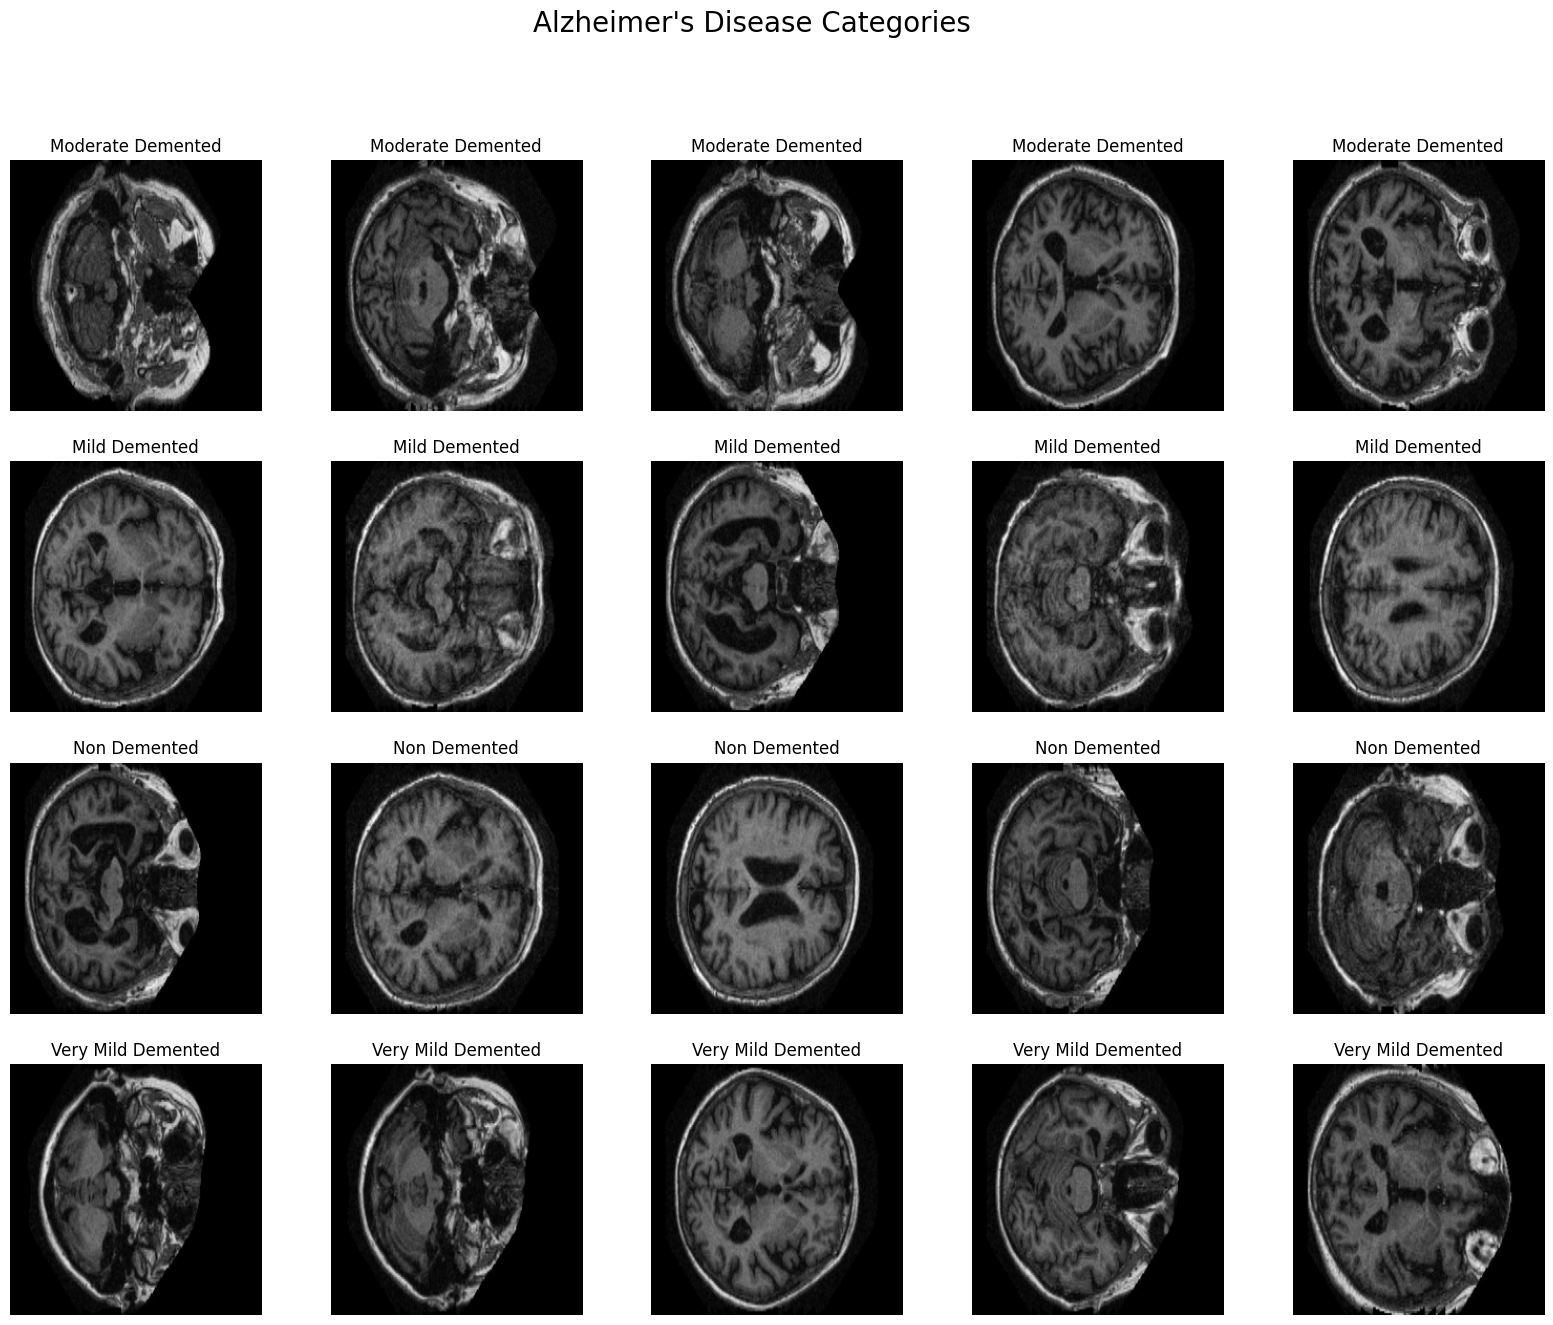

In [641]:
showImage(moderate_demented,mild_demented,non_demented,verymild_demented)

In [642]:
class SCANS(Dataset):
    def __init__(self):
        mild_demented,moderate_demented,non_demented,verymild_demented=[],[],[],[]
        mild_demented_path=r"C:\Users\Asus\Desktop\projectexpo\Data-86400\Mild Demented"
        moderate_demented_path=r"C:\Users\Asus\Desktop\projectexpo\Data-86400\Moderate Demented"
        non_demented_path=r"C:\Users\Asus\Desktop\projectexpo\Data-86400\Non Demented"
        verymild_demented_path=r"C:\Users\Asus\Desktop\projectexpo\Data-86400\Very Mild Demented" 
        for files in glob.iglob(mild_demented_path+'**/*', recursive=True):
            img=cv2.imread(files)
            img=cv2.resize(img,(240,240))
            b,g,r=cv2.split(img)
            img=cv2.merge([r,g,b])
            img=img.transpose((2, 0, 1))
            mild_demented.append(img)
            
        for files in glob.iglob(moderate_demented_path+'**/*', recursive=True):
            img=cv2.imread(files)
            img=cv2.resize(img,(240,240))
            b,g,r=cv2.split(img)
            img=cv2.merge([r,g,b])
            img=img.transpose((2, 0, 1))
            moderate_demented.append(img)
            
        for files in glob.iglob(non_demented_path+'**/*', recursive=True):
            img=cv2.imread(files)
            img=cv2.resize(img,(240,240))
            b,g,r=cv2.split(img)
            img=cv2.merge([r,g,b])
            img=img.transpose((2, 0, 1))
            non_demented.append(img)
            
        for files in glob.iglob(verymild_demented_path+'**/*', recursive=True):
            img=cv2.imread(files)
            img=cv2.resize(img,(240,240))
            b,g,r=cv2.split(img)
            img=cv2.merge([r,g,b])
            img=img.transpose((2, 0, 1))
            verymild_demented.append(img)
        #Our images
        moderate_demented = np.array(moderate_demented,dtype=np.float32)
        mild_demented = np.array(mild_demented,dtype=np.float32)
        non_demented = np.array(non_demented,dtype=np.float32)
        verymild_demented = np.array(verymild_demented,dtype=np.float32)
        #Our labels
        non_demented_labels=np.zeros(non_demented.shape[0])     #0
        verymild_demented_labels=np.ones(verymild_demented.shape[0])        #1
        mild_demented_labels=np.ones(mild_demented.shape[0])+1      #2
        moderate_demented_labels=np.ones(moderate_demented.shape[0])+2      #3
        self.labels=np.concatenate((mild_demented_labels,moderate_demented_labels,non_demented_labels,verymild_demented_labels),dtype=np.float32)
        self.images = np.concatenate((mild_demented,moderate_demented, non_demented, verymild_demented), axis=0,dtype=np.float32)
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        sample={"image": self.images[index],"label": self.labels[index]}
        return sample
    def normalize(self):
        self.images=self.images/255.0        
    

In [643]:
mri=SCANS()
mri.normalize()
    

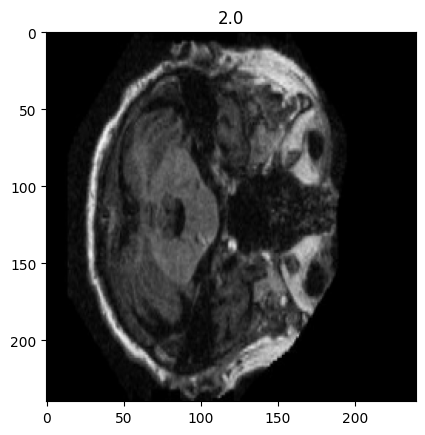

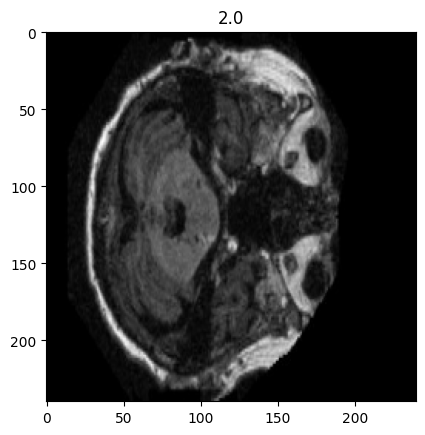

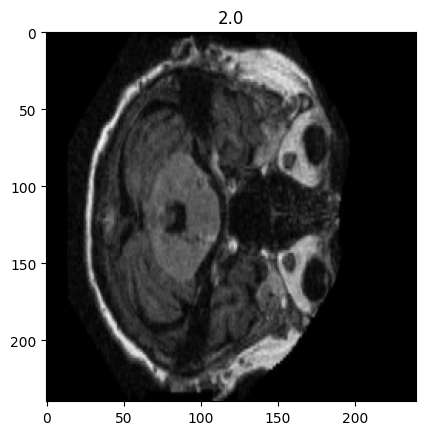

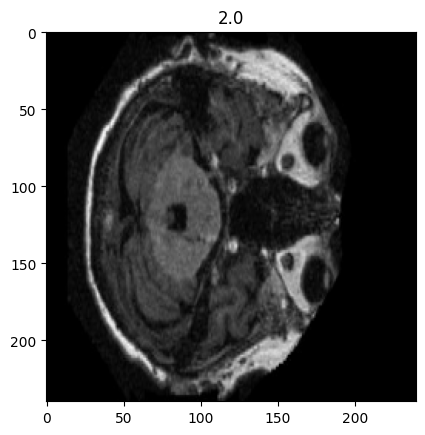

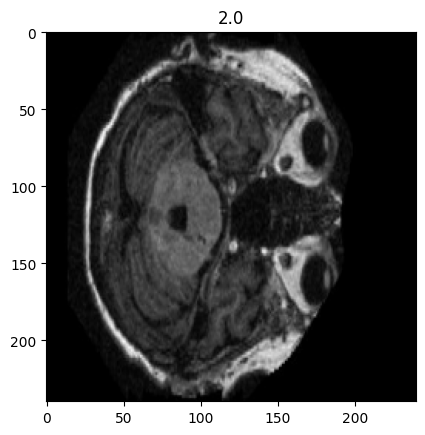

In [644]:
it=iter(mri)
for i in range(5):
    sample=next(it)
    img=sample["image"]
    label=sample["label"]
    img=img.transpose((1,2,0))
    plt.title(label)
    plt.imshow(img)
    plt.show()
    

In [645]:
dataloader = DataLoader(mri, batch_size=32, shuffle=True)
for sample in dataloader:
    imgs= sample["image"].squeeze()
    labels = sample["label"]
    
    # Iterate over the batch
    for i in range(imgs.shape[0]):
        img = imgs[i]
        label = labels[i]
        
        # Display the image
        #plt.title(f"Label: {label}")
        #plt.imshow(img)
        # plt.show()

In [646]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn_model=nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),  
            
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)  ,
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),
            
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),
            
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5)  ,
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),
            
        nn.Conv2d(in_channels=256, out_channels=4, kernel_size=3)  ,
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2))
        self.conv_output_size=self._get_conv_output_size((3,240,240))
        #Fully Connected Layer          
        self.fc_model=nn.Sequential(
            nn.Linear(in_features=self.conv_output_size, out_features=128),nn.Tanh(),
            nn.Linear(in_features=128, out_features=64),nn.Tanh(),
            nn.Linear(in_features=64, out_features=32),nn.Tanh(),
            nn.Linear(in_features=32, out_features=4))
        #Flattening
    def _get_conv_output_size(self, shape):
        batch_size = 1
        input = torch.autograd.Variable(torch.rand(batch_size, *shape))
        output_feat = self.cnn_model(input)
        n_size = output_feat.data.view(batch_size, -1).size(1)
        return n_size
    def forward(self,x):
        x=self.cnn_model(x)         
        x=x.view(x.size(0),-1)
        x=self.fc_model(x)
        x=F.sigmoid(x)
        return x
            

In [647]:
mri_dataset=SCANS()
mri_dataset.normalize()
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=CNN().to(device)

In [648]:
dataloader=DataLoader(mri, batch_size=32, shuffle=False)        

In [649]:
model.eval()
output=[]
y_true=[]
#if device==gpu then update image=D["image"].to(device) and labels too
with torch.no_grad():
    for D in dataloader:
        image=D["image"]
        label=D["label"]
        y_hat=model(image)
        output.append(y_hat.detach().cpu().numpy())
        y_true.append(label.detach().cpu().numpy())

In [650]:
output =np.concatenate(output,axis=0)
y_true=np.concatenate(y_true,axis=0)

In [651]:
def threshold(scores, thresholds=[0.37, 0.5, 0.75]):
    x = np.array(list(scores))
        # Ensure x is 2D
    if x.ndim == 1:
        x = x.reshape(1, -1)
    
    # Get the index of the maximum score for each sample
    max_indices = np.argmax(x, axis=1)
    
    # Apply thresholds to the maximum scores
    max_scores = np.max(x, axis=1)
    result = np.zeros(len(max_scores), dtype=int)
    result[result >= thresholds[2]] = 3
    result[(result >= thresholds[1]) & (result < thresholds[2])] = 2
    result[(result >= thresholds[0]) & (result< thresholds[1])] = 1
    result[result < thresholds[0]] = 0
    
    return result

    

In [652]:
accuracy_score(y_true,threshold(output))

0.25